In [37]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.fftpack import fft
from scipy.stats import entropy
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Function to load and combine CSV files

def load_and_combine_csv(file_paths):
    dataframes = []
    col_names = ['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'label']
    for file in file_paths:
        df = pd.read_csv(file, names=col_names)
        df['participant_id'] = os.path.basename(file).split('.')[0]
        dataframes.append(df)
    combined_data = pd.concat(dataframes, ignore_index=True)
    return combined_data

In [3]:
# Directory paths

data_directory_path = r'C:\Users\AHAO\OneDrive - Capco\Desktop\Abhi\Kovai.co\Ko.co assign\Activity Recognition'
output_directory_path = r'C:\Users\AHAO\OneDrive - Capco\Desktop\Abhi\Kovai.co\Ko.co assign\MotionSense\Documents'

In [4]:
# Load CSV files

file_paths = glob.glob(data_directory_path + '/*.csv')
combined_data = load_and_combine_csv(file_paths)

In [6]:
combined_data.to_csv(data_directory_path + '/processed_raw_data.csv', index=False)

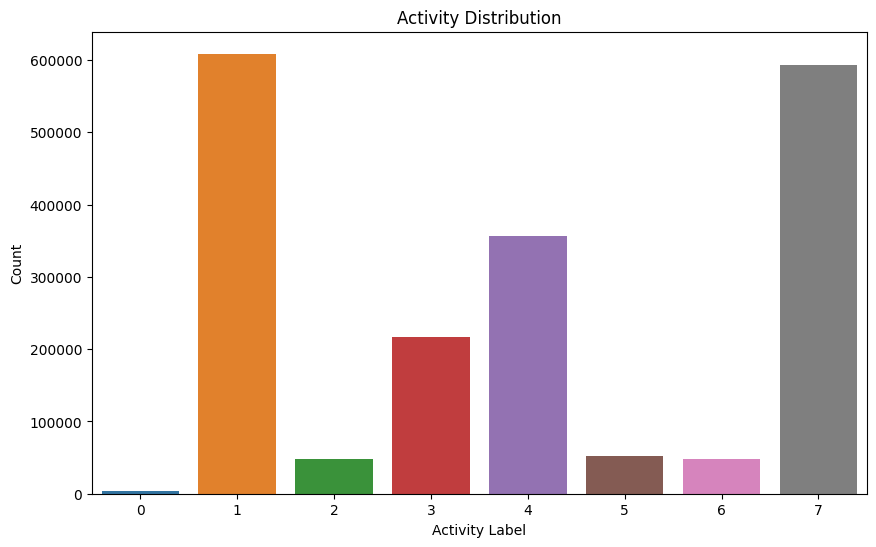

In [9]:
# Activity Distribution

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='label')
plt.title('Activity Distribution')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.xticks(ticks=range(8), labels=['0', '1', '2', '3', '4', '5', '6', '7'])
plt.savefig(os.path.join(output_directory_path, 'activity_distribution.png'))

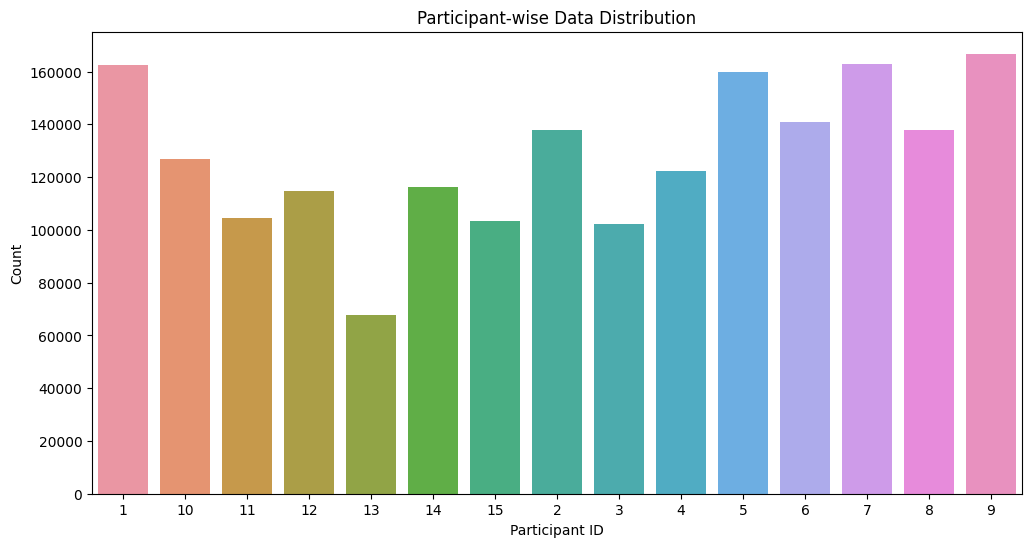

In [10]:
# Participant-wise Data Distribution

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data, x='participant_id')
plt.title('Participant-wise Data Distribution')
plt.xlabel('Participant ID')
plt.ylabel('Count')
plt.savefig(os.path.join(output_directory_path, 'participant_distribution.png'))

In [11]:
# Basic Statistics for each Activity
grouped_data = combined_data.groupby('label')[['x_acceleration', 'y_acceleration', 'z_acceleration']].describe()
print(grouped_data)

      x_acceleration                                                           \
               count         mean         std     min     25%     50%     75%   
label                                                                           
0             3719.0  2077.269427   79.442835  1716.0  2074.0  2095.0  2100.0   
1           608667.0  1977.689653  101.580145   282.0  1899.0  1970.0  2029.0   
2            47878.0  1969.489431  110.537379  1301.0  1887.0  1972.0  2033.0   
3           216737.0  1996.272755  121.542182  1199.0  1894.0  2035.0  2095.0   
4           357064.0  1976.819111  124.060266  1361.0  1888.0  1984.0  2068.0   
5            51498.0  2000.554449  111.237068  1486.0  1919.0  2018.0  2094.0   
6            47770.0  2027.107076  121.550283  1687.0  1921.0  2083.0  2122.0   
7           593563.0  1997.845983  105.899692  1251.0  1913.0  2030.0  2076.0   

              y_acceleration               ...                 z_acceleration  \
          max          coun

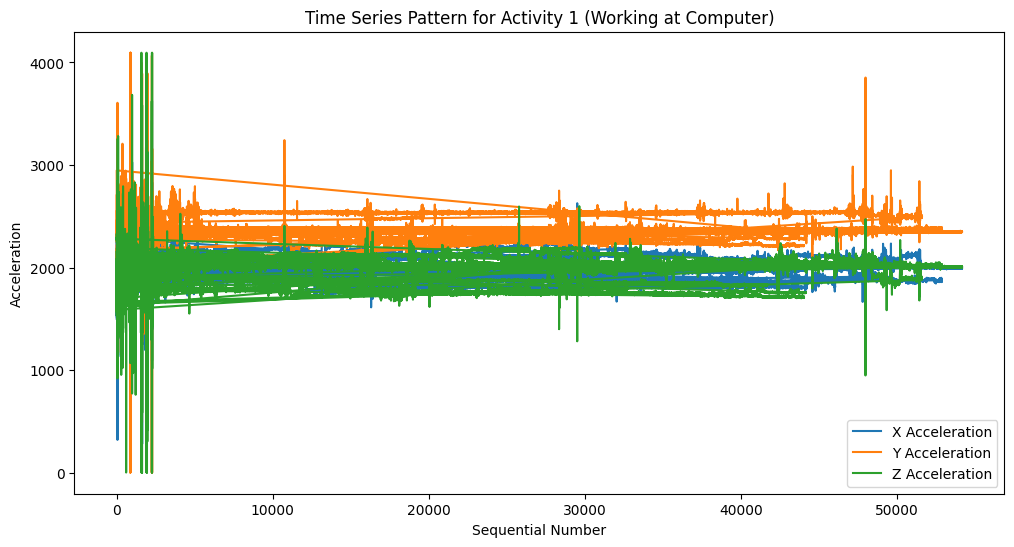

In [12]:
# Time Series Pattern
sample_data = combined_data[combined_data['label'] == 1] 
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 1 (Working at Computer)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_1.png'))

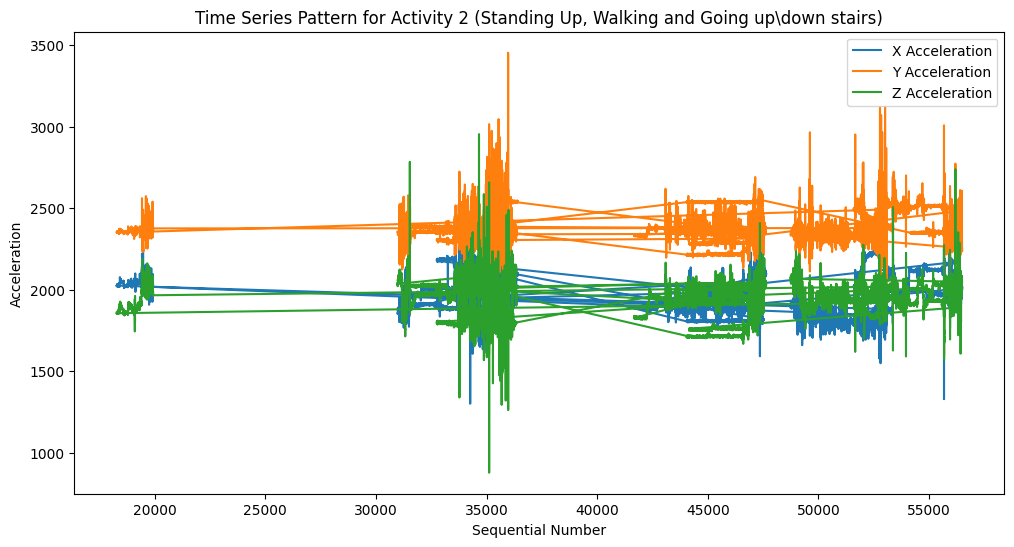

In [14]:
# Time Series Pattern2
sample_data = combined_data[combined_data['label'] == 2]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 2 (Standing Up, Walking and Going up\down stairs)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_2.png'))

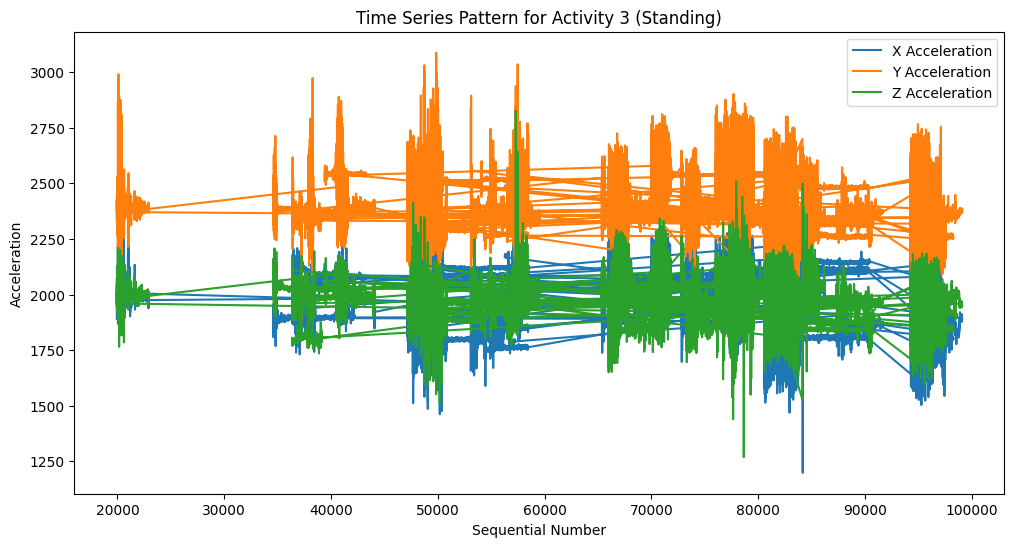

In [15]:
# Time Series Pattern3
sample_data = combined_data[combined_data['label'] == 3]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 3 (Standing)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_3.png'))

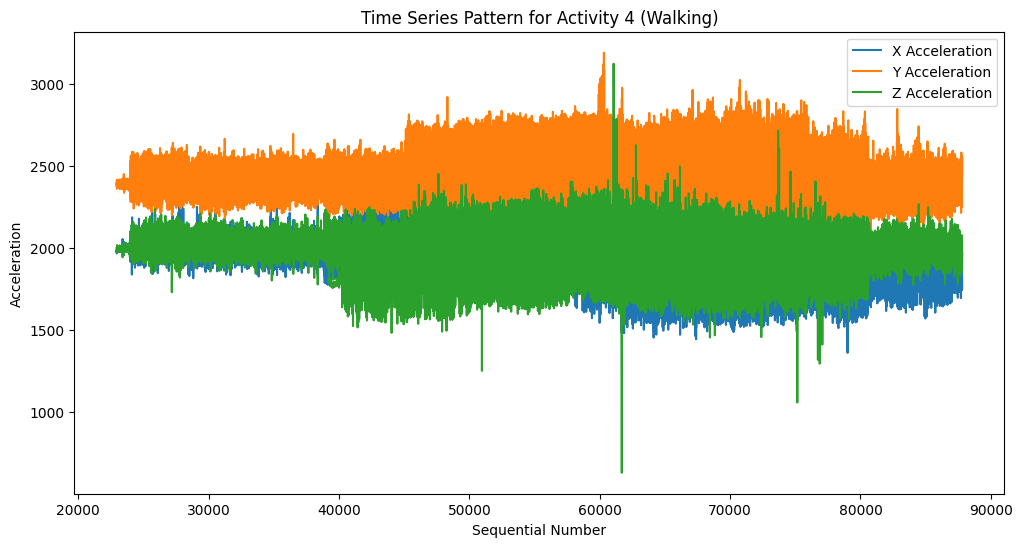

In [16]:
# Time Series Pattern4
sample_data = combined_data[combined_data['label'] == 4]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 4 (Walking)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_4.png'))

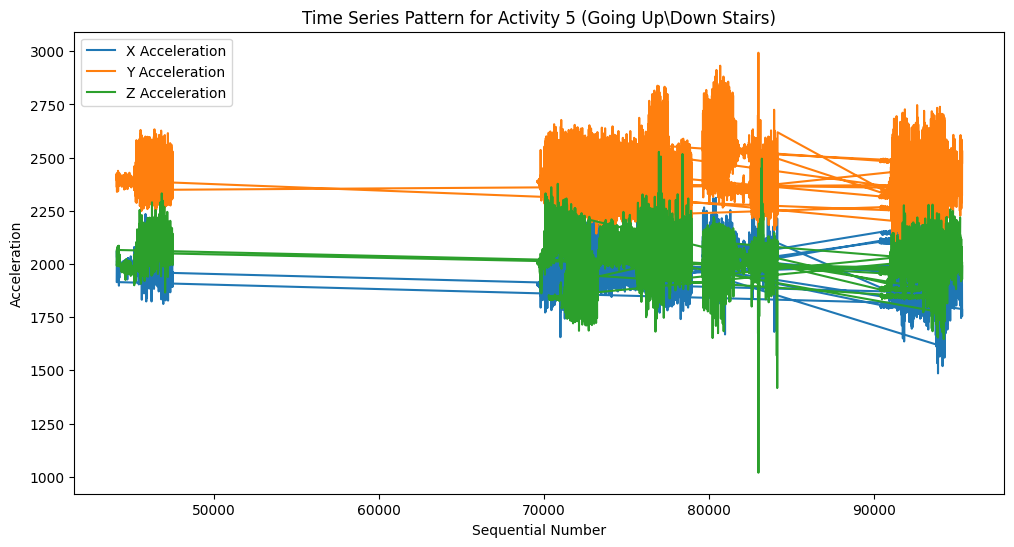

In [17]:
# Time Series Pattern5
sample_data = combined_data[combined_data['label'] == 5]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 5 (Going Up\Down Stairs)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_5.png'))

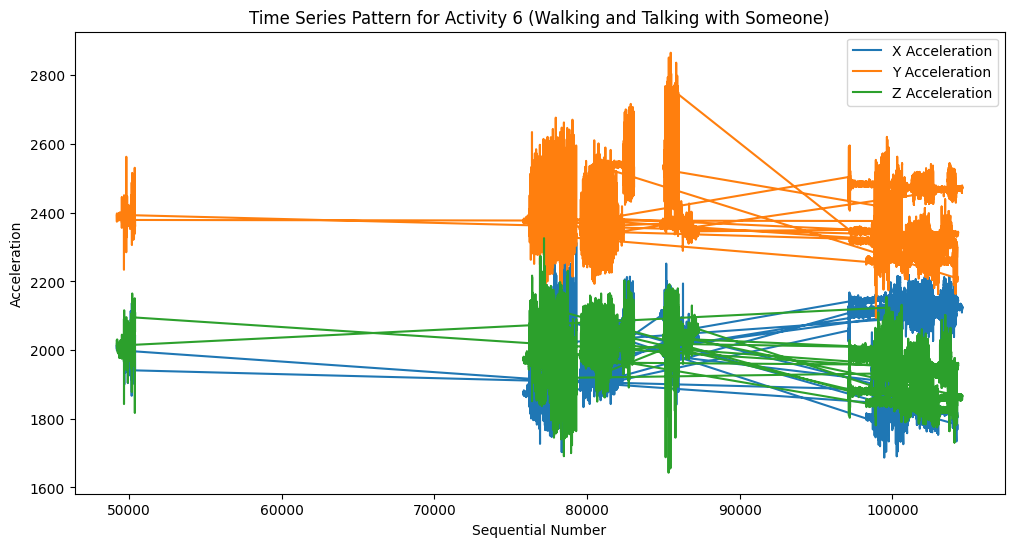

In [18]:
# Time Series Pattern6
sample_data = combined_data[combined_data['label'] == 6]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 6 (Walking and Talking with Someone)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_6.png'))

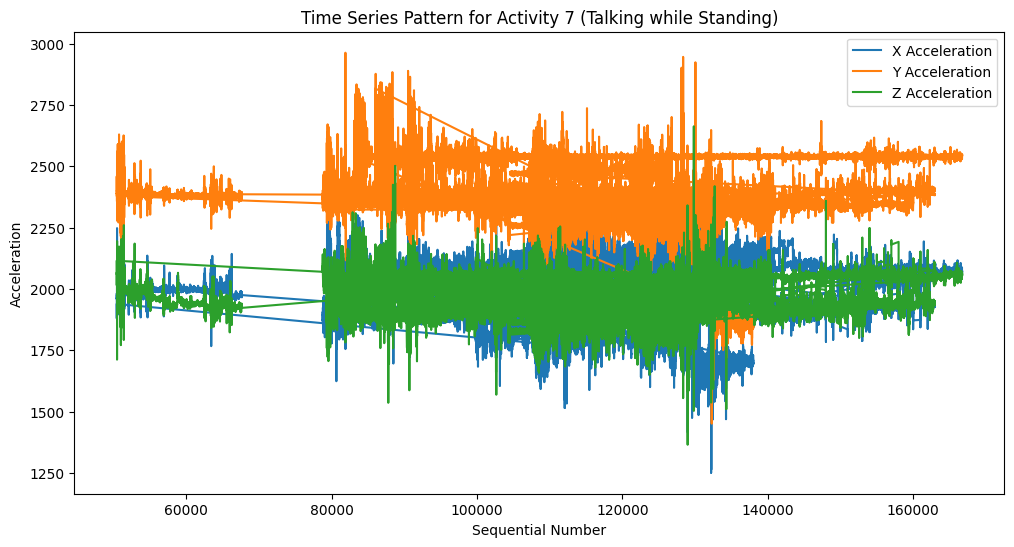

In [19]:
# Time Series Pattern6
sample_data = combined_data[combined_data['label'] == 7]  
plt.figure(figsize=(12, 6))
plt.plot(sample_data['sequential_number'], sample_data['x_acceleration'], label='X Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['y_acceleration'], label='Y Acceleration')
plt.plot(sample_data['sequential_number'], sample_data['z_acceleration'], label='Z Acceleration')
plt.title('Time Series Pattern for Activity 7 (Talking while Standing)')
plt.xlabel('Sequential Number')
plt.ylabel('Acceleration')
plt.legend()
plt.savefig(os.path.join(output_directory_path, 'time_series_pattern_activity_7.png'))

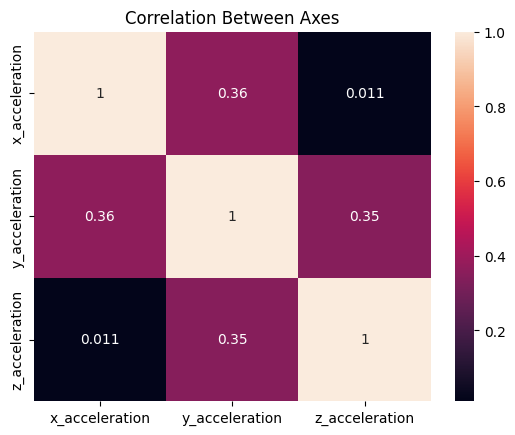

In [20]:
# Correlation Analysis

corr_matrix = combined_data[['x_acceleration', 'y_acceleration', 'z_acceleration']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Between Axes')
plt.savefig(os.path.join(output_directory_path, 'axes_correlation.png'))

In [23]:
# Function to calculate SMA

def calculate_sma(dataframe):
    return (dataframe['x_acceleration'].abs() + dataframe['y_acceleration'].abs() + dataframe['z_acceleration'].abs()).mean()

# Function to calculate signal energy
def signal_energy(dataframe):
    return np.sum(dataframe['x_acceleration']**2 + dataframe['y_acceleration']**2 + dataframe['z_acceleration']**2) / len(dataframe)

# Example of Fourier Transform
def fourier_transform(dataframe):
    x_fft = fft(dataframe['x_acceleration'])
    y_fft = fft(dataframe['y_acceleration'])
    z_fft = fft(dataframe['z_acceleration'])
    return x_fft, y_fft, z_fft

# SMA calculation
sma = calculate_sma(combined_data)

# Energy calculation
energy = signal_energy(combined_data)

# Fourier Transform
x_fft, y_fft, z_fft = fourier_transform(combined_data)

# Print results for a quick look
print(f"SMA: {sma}, Energy: {energy}")

SMA: 6340.77115630527, Energy: 13541811.557074176


In [30]:
# Feature extraction functions

def calculate_sma(df):
    return np.mean(np.sum(np.abs(df[['x_acceleration', 'y_acceleration', 'z_acceleration']]), axis=1))

def calculate_energy(df):
    return np.mean(np.sum(np.square(df[['x_acceleration', 'y_acceleration', 'z_acceleration']]), axis=1))

# Initialize lists to store the results
sma_values = []
energy_values = []
participant_ids = []
labels = []

# Loop through each group and calculate the features
for (participant_id, label), group in combined_data.groupby(['participant_id', 'label']):
    sma_values.append(calculate_sma(group))
    energy_values.append(calculate_energy(group))
    participant_ids.append(participant_id)
    labels.append(label)

# Create a new DataFrame with the calculated features
features_df = pd.DataFrame({
    'participant_id': participant_ids,
    'label': labels,
    'sma': sma_values,
    'energy': energy_values
})

# Now you can merge this back with the original DataFrame if needed
combined_data_with_features = pd.merge(combined_data, features_df, on=['participant_id', 'label'], how='left')

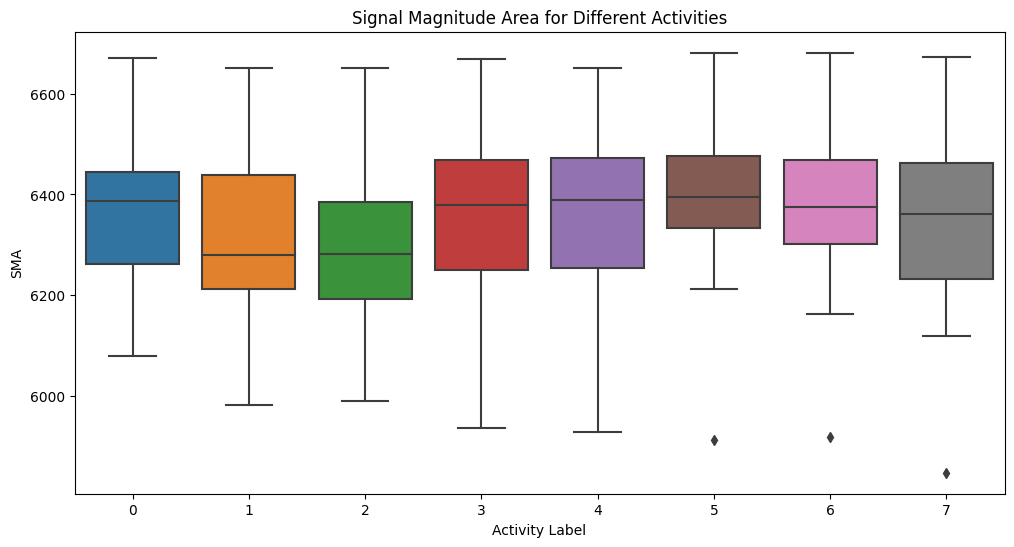

In [34]:
# Visualization of SMA for different activities

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='sma', data=features_df)
plt.title('Signal Magnitude Area for Different Activities')
plt.xlabel('Activity Label')
plt.ylabel('SMA')
plt.xticks(ticks=range(8), labels=['0', '1', '2', '3', '4', '5', '6', '7'])
plt.savefig(f'{output_directory_path}/sma_activities.png') 
plt.show()

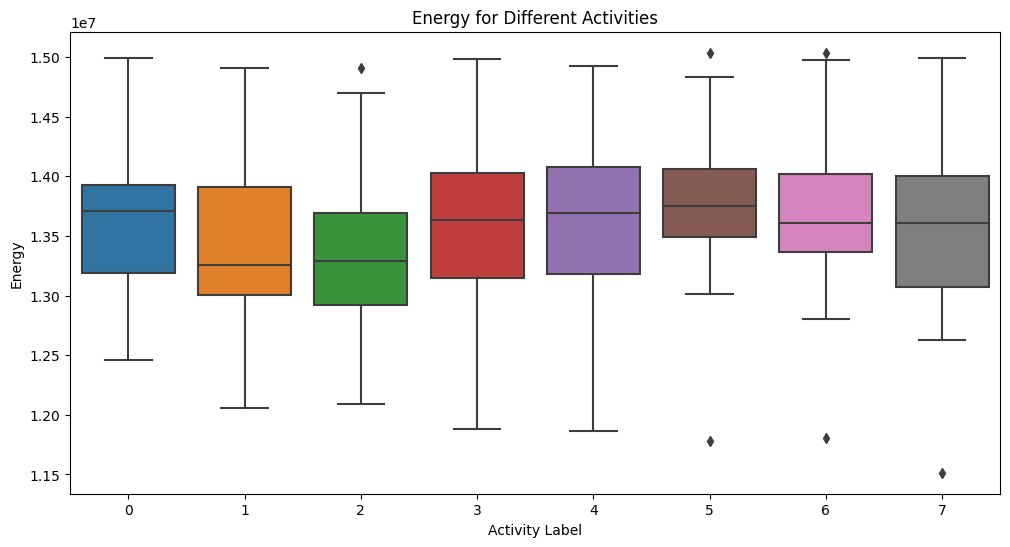

In [35]:
# Visualization of Energy for different activities

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='energy', data=features_df)
plt.title('Energy for Different Activities')
plt.xlabel('Activity Label')
plt.ylabel('Energy')
plt.xticks(ticks=range(8), labels=['0', '1', '2', '3', '4', '5', '6', '7'])
plt.savefig(f'{output_directory_path}/energy_activities.png')
plt.show()

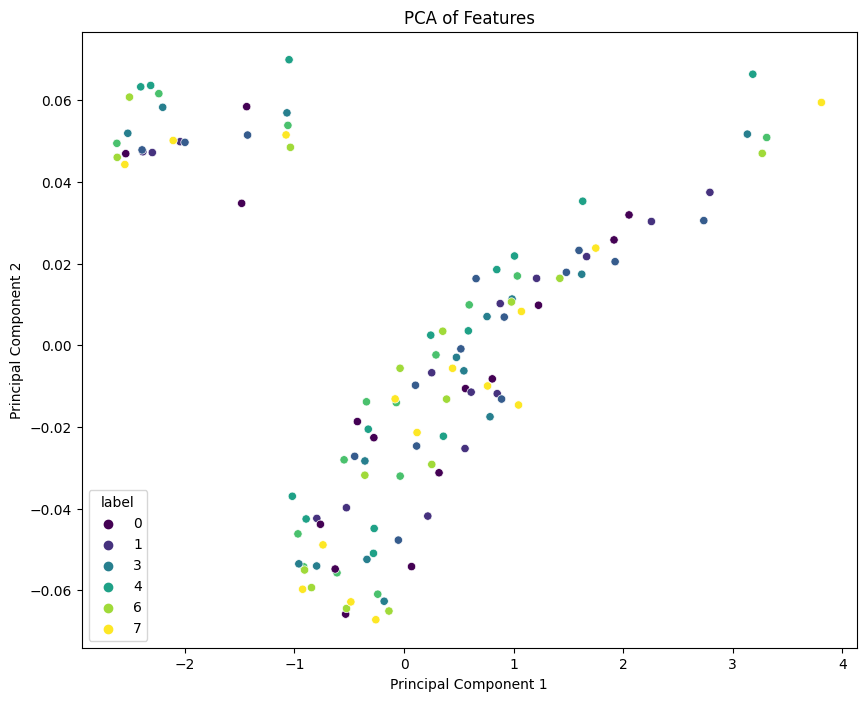

In [41]:
#Perform and visualize Principal Component Analysis

# Select features for PCA
features = ['sma', 'energy']  # Add other features as necessary
x = features_df[features]

# Standardize the features
x_standardized = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
principal_components = pca.fit_transform(x_standardized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['label'] = features_df['label']  # Adding labels for coloring

# Visualization of PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='label', palette='viridis')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Saving the PCA plot
output_directory_path = r'C:\Users\AHAO\OneDrive - Capco\Desktop\Abhi\Kovai.co\Ko.co assign\MotionSense\Documents'
plt.savefig(f'{output_directory_path}/pca_features.png')
plt.show()

In [42]:
# Check for missing data

missing_data = combined_data.isnull().sum()
print("Missing data in each column:\n", missing_data)

Missing data in each column:
 sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
participant_id       0
dtype: int64


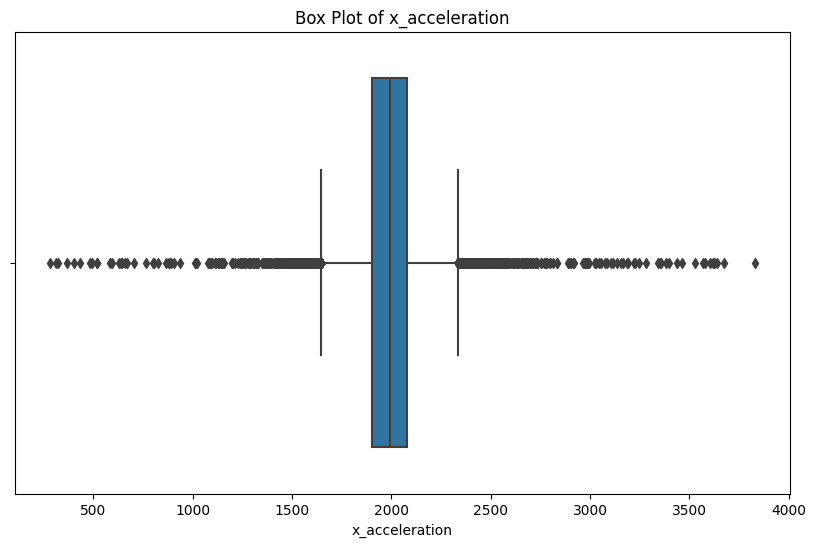

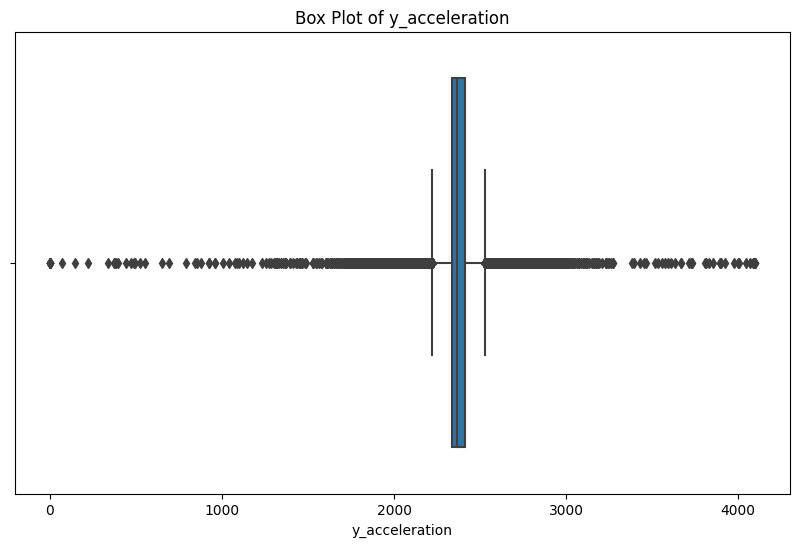

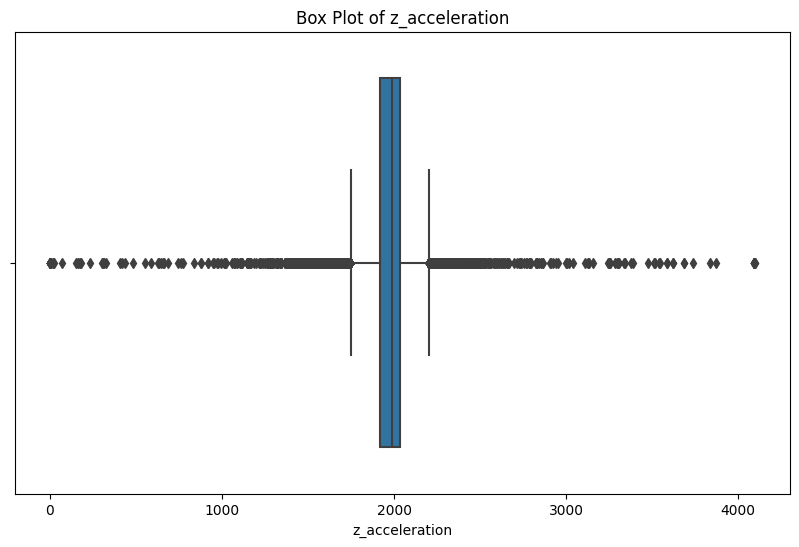

In [44]:
#Box Plots for Outlier Detection

# List of numerical features to check for outliers
features_to_check = ['x_acceleration', 'y_acceleration', 'z_acceleration']

# Create box plots for each feature
for feature in features_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=combined_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.savefig(f'{output_directory_path}/{feature}_boxplot.png')
    plt.show()